In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import wfdb

print('success')

success


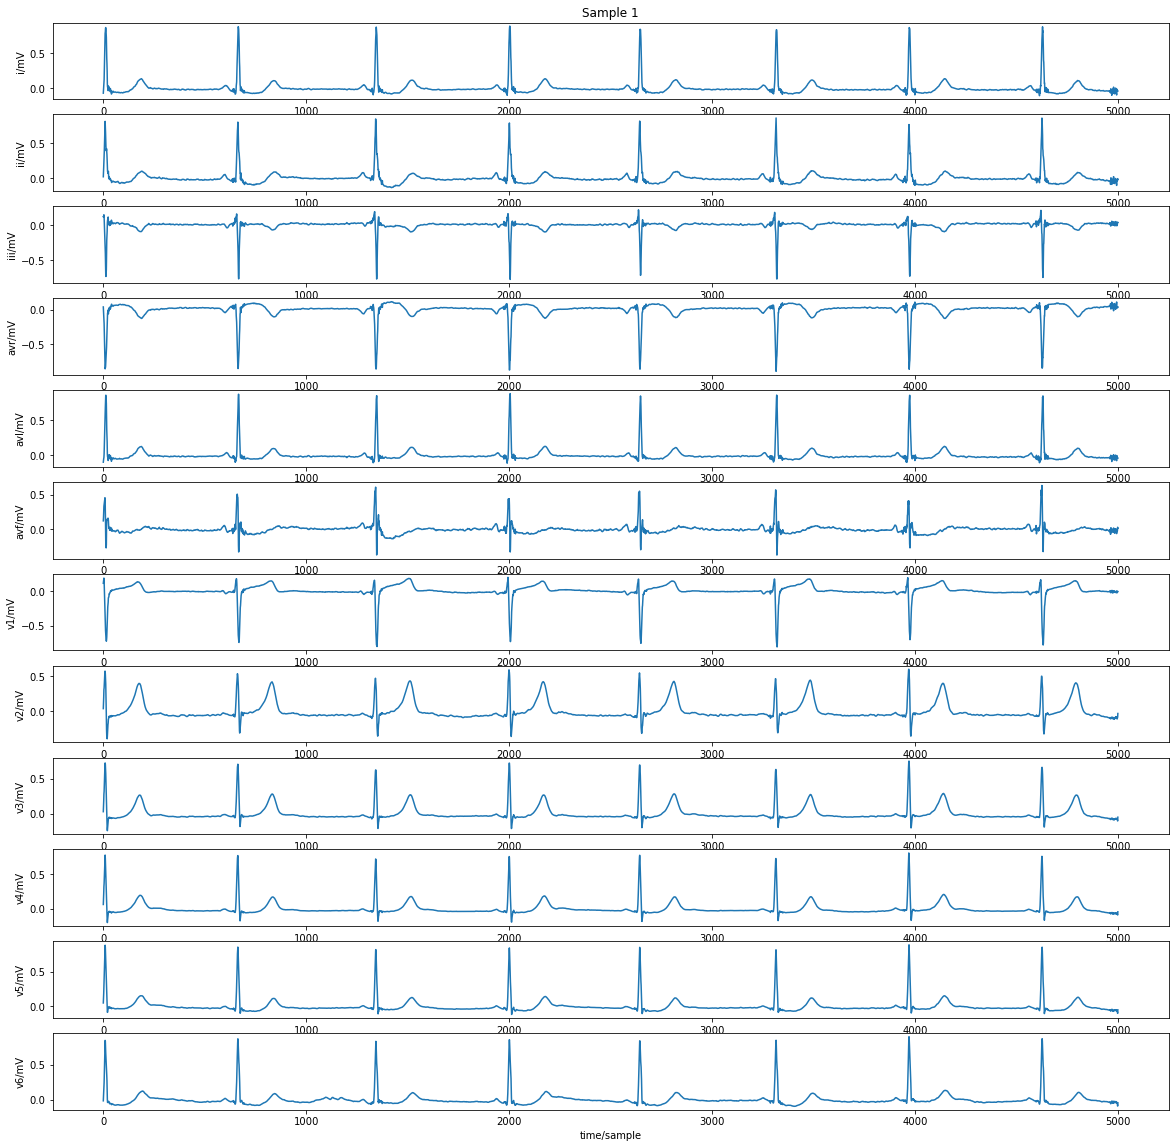

{'record_name': '1',
 'n_sig': 12,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': None,
 'base_date': None,
 'comments': ['<age>: 51',
  '<sex>: F',
  '<diagnoses>:',
  'Rhythm: Sinus bradycardia.',
  'Electric axis of the heart: left axis deviation.',
  'Left ventricular hypertrophy.',
  'Left ventricular overload.',
  'Non-specific repolarization abnormalities: posterior wall.'],
 'sig_name': ['i',
  'ii',
  'iii',
  'avr',
  'avl',
  'avf',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6'],
 'p_signal': array([[-0.07342657,  0.01907131,  0.12205045, ...,  0.06085455,
          0.04869817, -0.01784489],
        [-0.02855478,  0.0787728 ,  0.1179821 , ...,  0.13206733,
          0.11137898,  0.04529856],
        [ 0.01689977,  0.16003317,  0.13425549, ...,  0.2149331 ,
          0.18466731,  0.10363761],
        ...,
        [-0.04079254, -0.03648425,  0.02196908, ..., -0.07941303,
         -0.08244937, -0.06932052],
        [-0.03671329, -0.00

In [3]:
record = wfdb.rdrecord('data/data/1') 
wfdb.plot_wfdb(record=record, title='Sample 1', figsize=(20,20)) 
display(record.__dict__)

In [169]:
# header file contents
header = wfdb.rdsamp('data/data/1')[1]
header['comments'][3:]

['Rhythm: Sinus bradycardia.',
 'Electric axis of the heart: left axis deviation.',
 'Left ventricular hypertrophy.',
 'Left ventricular overload.',
 'Non-specific repolarization abnormalities: posterior wall.']

In [113]:
# load .i annotator file 
ann = wfdb.rdann('data/data/1', 'i') 

In [26]:
# label name reminder
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [56]:
# extract labels and samples
isymbol = ann.symbol
isample = ann.sample
print(isymbol, isample, sep='\n')

['(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')', '(', 't', ')', '(', 'p', ')', '(', 'N', ')']
[ 641  664  690  773  840  887 1252 1282 1301 1324 1344 1374 1457 1519
 1567 1911 1938 1961 1980 2002 2028 2118 2176 2219 2538 2581 2604 2624
 2645 2670 2758 2820 2864 3224 3252 3278 3297 3316 3340 3434 3491 3534
 3882 3908 3937 3953 3971 3996]


In [144]:
# create cleaned up column names
def ann_col_decrypt(ann):
    cols = ann.symbol.copy()

    for i in range(len(cols)):
        if cols[i] == 'N':
            cols[i] = f'normal_beat.peak_{i//9+1}'
        elif cols[i] == 't':
            cols[i] = f't_wave.peak_{i//9+1}'
        elif cols[i] == 'p':
            cols[i] = f'p_wave.peak_{i//9+1}'
    for i in range(len(cols)):
        if i%3 == 0:
            cols[i] = f'{cols[i+1][:cols[i+1].find(".")]}.beg_{i//9+1}'
        elif i%3 == 2:
            cols[i] = f'{cols[i-1][:cols[i-1].find(".")]}.end_{i//9+1}'
    for i in range(len(cols)):
        cols[i] = ann.extension + '_' + cols[i]
    return np.array(cols)
ann_col_decrypt(ann)

array(['i_normal_beat.beg_1', 'i_normal_beat.peak_1',
       'i_normal_beat.end_1', 'i_t_wave.beg_1', 'i_t_wave.peak_1',
       'i_t_wave.end_1', 'i_p_wave.beg_1', 'i_p_wave.peak_1',
       'i_p_wave.end_1', 'i_normal_beat.beg_2', 'i_normal_beat.peak_2',
       'i_normal_beat.end_2', 'i_t_wave.beg_2', 'i_t_wave.peak_2',
       'i_t_wave.end_2', 'i_p_wave.beg_2', 'i_p_wave.peak_2',
       'i_p_wave.end_2', 'i_normal_beat.beg_3', 'i_normal_beat.peak_3',
       'i_normal_beat.end_3', 'i_t_wave.beg_3', 'i_t_wave.peak_3',
       'i_t_wave.end_3', 'i_p_wave.beg_3', 'i_p_wave.peak_3',
       'i_p_wave.end_3', 'i_normal_beat.beg_4', 'i_normal_beat.peak_4',
       'i_normal_beat.end_4', 'i_t_wave.beg_4', 'i_t_wave.peak_4',
       'i_t_wave.end_4', 'i_p_wave.beg_4', 'i_p_wave.peak_4',
       'i_p_wave.end_4', 'i_normal_beat.beg_5', 'i_normal_beat.peak_5',
       'i_normal_beat.end_5', 'i_t_wave.beg_5', 'i_t_wave.peak_5',
       'i_t_wave.end_5', 'i_p_wave.beg_5', 'i_p_wave.peak_5',
       'i_p_w

In [90]:
# create dataframe
isample.reshape(1,48).tolist()

# i = pd.DataFrame(isample, columns=cols)
i = pd.Series(isample, index=cols).to_frame(0).T
i

,normal_beat.beg_1,normal_beat.peak_1,normal_beat.end_1,t_wave.beg_1,t_wave.peak_1,t_wave.end_1,p_wave.beg_1,p_wave.peak_1,p_wave.end_1,normal_beat.beg_2,...,normal_beat.end_5,t_wave.beg_5,t_wave.peak_5,t_wave.end_5,p_wave.beg_5,p_wave.peak_5,p_wave.end_5,normal_beat.beg_6,normal_beat.peak_6,normal_beat.end_6
0,641,664,690,773,840,887,1252,1282,1301,1324,...,3340,3434,3491,3534,3882,3908,3937,3953,3971,3996


In [179]:
# function for creating one line in database
def extract_ann(num):
    header = wfdb.rdsamp(f'data/data/{num}')[1]
    i = wfdb.rdann(f'data/data/{num}', 'i') 
    ii = wfdb.rdann(f'data/data/{num}', 'ii')
    iii = wfdb.rdann(f'data/data/{num}', 'iii')
    avr = wfdb.rdann(f'data/data/{num}', 'avr')
    avl = wfdb.rdann(f'data/data/{num}', 'avl')
    avf = wfdb.rdann(f'data/data/{num}', 'avf')
    v1 = wfdb.rdann(f'data/data/{num}', 'v1')
    v2 = wfdb.rdann(f'data/data/{num}', 'v2')
    v3 = wfdb.rdann(f'data/data/{num}', 'v3')
    v4 = wfdb.rdann(f'data/data/{num}', 'v4')
    v5 = wfdb.rdann(f'data/data/{num}', 'v5')
    v6 = wfdb.rdann(f'data/data/{num}', 'v6')
    
    age = int(header['comments'][0][header['comments'][1].find(':') + 2:])
    sex = header['comments'][1][-1]
    diagnoses = tuple(header['comments'][3:])
    
    final_cols = np.array(['age', 'sex', 'diagnoses'], dtype=object)
    final_samples = np.array([age, sex, diagnoses])
#     final_samples = np.concatenate((final_samples, ii.sample))
    for el in (i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6):
        final_cols = np.concatenate((final_cols, ann_col_decrypt(el)))
        final_samples = np.concatenate((final_samples, el.sample))
    df = pd.Series(final_samples, index=final_cols).to_frame(0).T
    return df


In [180]:
extract_ann(1)

<ipython-input-179-9dcc4ce518b4>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final_samples = np.array([age, sex, diagnoses])


,age,sex,diagnoses,i_normal_beat.beg_1,i_normal_beat.peak_1,i_normal_beat.end_1,i_t_wave.beg_1,i_t_wave.peak_1,i_t_wave.end_1,i_p_wave.beg_1,...,v6_normal_beat.end_5,v6_t_wave.beg_5,v6_t_wave.peak_5,v6_t_wave.end_5,v6_p_wave.beg_5,v6_p_wave.peak_5,v6_p_wave.end_5,v6_normal_beat.beg_6,v6_normal_beat.peak_6,v6_normal_beat.end_6
0,51,F,"(Rhythm: Sinus bradycardia., Electric axis of ...",641,664,690,773,840,887,1252,...,3332,3425,3493,3543,3880,3904,3930,3950,3969,3986


In [202]:
# whole database
data = extract_ann(8)

# for j in range(2, 7):
#     data = pd.concat([data, extract_ann(j)])
# # data = pd.concat([data, extract_ann(3)])
data

<ipython-input-179-9dcc4ce518b4>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final_samples = np.array([age, sex, diagnoses])


,age,sex,diagnoses,i_normal_beat.beg_1,i_normal_beat.peak_1,i_normal_beat.end_1,i_t_wave.beg_1,i_t_wave.peak_1,i_t_wave.end_1,i_normal_beat.beg_1,...,v6_t_wave.end_6,v6_normal_beat.beg_6,v6_normal_beat.peak_6,v6_normal_beat.end_6,v6_t_wave.beg_6,v6_t_wave.peak_6,v6_t_wave.end_6,v6_normal_beat.beg_7,v6_normal_beat.peak_7,v6_normal_beat.end_7
0,57,F,"(Rhythm: Atrial fibrillation., Undefined ische...",665,706,738,783,818,851,1083,...,3741,3984,4026,4041,4067,4116,4166,4401,4461,4471
